# **The Nuts and bolts of machine learning**

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers using tree-based modeling techniques to predict on a binary target class. 
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  


# Build a machine learning model

Instead of predicting people who won't tip at all, I predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

### **Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', 50)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

In [3]:
# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
...,...,...,...
22694,8.594643,1.098214,7.799138
22695,59.560417,18.757500,52.000000
22696,6.609091,0.684242,6.130896
22697,16.650000,2.077500,11.707049


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
df1 = pd.concat((df0,nyc_preds_means),axis=1)

In [7]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


### ** Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

From EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, I'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [9]:
# Subset the data to isolate only customers who paid by credit card
df = df1
df = df1[df1.payment_type == 1]
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous.

In [10]:
# Create tip % col
#==> ENTER YOUR CODE HERE
tip_percent = df.tip_amount / (df.total_amount - df.tip_amount)
df['tip_percent'] = tip_percent
df.tip_percent

0        0.200000
1        0.238095
2        0.198630
3        0.300000
5        0.200000
           ...   
22692    0.199507
22693    0.200000
22695    0.250000
22697    0.150442
22698    0.199153
Name: tip_percent, Length: 15265, dtype: float64

In [11]:
df.tip_percent = df.tip_percent.round(decimals=3)

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [12]:
# Create 'generous' col (target)
df['generous'] = df.tip_percent.copy()
df['generous'] = (df.tip_percent>=0.2)
df.generous = df.generous.astype(int)

In [13]:
df.generous = df.generous.astype(int)

In [14]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1


#### Create day column

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [15]:
# Convert pickup and dropoff cols to datetime
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [16]:
# Create a 'day' col
df['day'] = df.tpep_pickup_datetime.dt.strftime('%A')

In [17]:
# Create 'am_rush' col
df['am_rush'] = np.where( (df.tpep_pickup_datetime.dt.hour >= 6)  & (df.tpep_pickup_datetime.dt.hour <=10),1,0)

# Create 'daytime' col
df['daytime'] = np.where( (df.tpep_pickup_datetime.dt.hour >= 10)  & (df.tpep_pickup_datetime.dt.hour <=16),1,0)

# Create 'pm_rush' col
df['pm_rush'] = np.where( (df.tpep_pickup_datetime.dt.hour >= 16)  & (df.tpep_pickup_datetime.dt.hour <=20),1,0)

# Create 'nighttime' col
df['nighttime'] = np.where( (df.tpep_pickup_datetime.dt.hour >= 20)  & (df.tpep_pickup_datetime.dt.hour <=6),1,0)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,Saturday,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,Tuesday,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,Friday,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,Sunday,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,Saturday,0,0,1,0


#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [18]:
# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b')

Examine the first five rows of your dataframe.

In [19]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,Saturday,1,0,0,0,Mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,Tuesday,0,1,0,0,Apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,Friday,1,0,0,0,Dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,Sunday,0,1,0,0,May
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,Saturday,0,0,1,0,Mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [20]:
# Drop columns
df = df.drop(columns=['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime', 'payment_type', 'trip_distance', 'tip_amount', 'tip_percent', 'total_amount', 'tolls_amount'],axis=0)
df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,improvement_surcharge,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,N,100,231,13.0,0.0,0.5,0.3,22.847222,3.521667,16.434245,1,Saturday,1,0,0,0,Mar
1,1,1,1,N,186,43,16.0,0.0,0.5,0.3,24.470370,3.108889,16.052218,1,Tuesday,0,1,0,0,Apr
2,1,1,1,N,262,236,6.5,0.0,0.5,0.3,7.250000,0.881429,7.053706,0,Friday,1,0,0,0,Dec
3,2,1,1,N,188,97,20.5,0.0,0.5,0.3,30.250000,3.700000,18.731650,1,Sunday,0,1,0,0,May
5,2,6,1,N,161,236,9.0,0.5,0.5,0.3,11.855376,2.052258,10.441351,1,Saturday,0,0,1,0,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,1,1,1,N,249,17,19.0,0.5,0.5,0.3,18.016667,5.700000,19.426247,1,Sunday,0,0,0,0,Jul
22693,2,1,1,N,229,170,7.5,0.5,0.5,0.3,8.095370,1.062778,7.300146,1,Thursday,0,0,0,0,Aug
22695,2,1,2,N,132,164,52.0,0.0,0.5,0.3,59.560417,18.757500,52.000000,1,Sunday,0,1,1,0,Aug
22697,2,1,1,N,68,144,10.5,0.0,0.5,0.3,16.650000,2.077500,11.707049,0,Saturday,0,1,0,0,Jul


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [21]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']
# 2. Convert each column to string
for col in cols_to_str:
    df[col] = df[col].astype(str)
df.head(2)

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,improvement_surcharge,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,N,100,231,13.0,0.0,0.5,0.3,22.847222,3.521667,16.434245,1,Saturday,1,0,0,0,Mar
1,1,1,1,N,186,43,16.0,0.0,0.5,0.3,24.470370,3.108889,16.052218,1,Tuesday,0,1,0,0,Apr


Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [22]:
# Convert categoricals to binary
df2 = pd.get_dummies(df,drop_first=True)
df2

,VendorID,passenger_count,fare_amount,extra,mta_tax,improvement_surcharge,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,...,DOLocationID_89,DOLocationID_9,DOLocationID_90,DOLocationID_91,DOLocationID_92,DOLocationID_93,DOLocationID_95,DOLocationID_97,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2,6,13.0,0.0,0.5,0.3,22.847222,3.521667,16.434245,1,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,1,16.0,0.0,0.5,0.3,24.470370,3.108889,16.052218,1,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,1,1,6.5,0.0,0.5,0.3,7.250000,0.881429,7.053706,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,2,1,20.5,0.0,0.5,0.3,30.250000,3.700000,18.731650,1,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,2,6,9.0,0.5,0.5,0.3,11.855376,2.052258,10.441351,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,1,1,19.0,0.5,0.5,0.3,18.016667,5.700000,19.426247,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
22693,2,1,7.5,0.5,0.5,0.3,8.095370,1.062778,7.300146,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
22695,2,1,52.0,0.0,0.5,0.3,59.560417,18.757500,52.000000,1,0,1,1,0,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
22697,2,1,10.5,0.0,0.5,0.3,16.650000,2.077500,11.707049,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [23]:
# Get class balance of 'generous' col
df2.generous.value_counts()

generous
1    8035
0    7230
Name: count, dtype: int64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.


### **Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [24]:
# Isolate target variable (y)
y = df2['generous']
# Isolate the features (X)
X = df2.drop(columns=['generous'],axis=1)
X.head(2)

,VendorID,passenger_count,fare_amount,extra,mta_tax,improvement_surcharge,mean_duration,mean_distance,predicted_fare,am_rush,daytime,pm_rush,nighttime,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,...,DOLocationID_89,DOLocationID_9,DOLocationID_90,DOLocationID_91,DOLocationID_92,DOLocationID_93,DOLocationID_95,DOLocationID_97,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2,6,13.0,0.0,0.5,0.3,22.847222,3.521667,16.434245,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,1,16.0,0.0,0.5,0.3,24.470370,3.108889,16.052218,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train

,VendorID,passenger_count,fare_amount,extra,mta_tax,improvement_surcharge,mean_duration,mean_distance,predicted_fare,am_rush,daytime,pm_rush,nighttime,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,...,DOLocationID_89,DOLocationID_9,DOLocationID_90,DOLocationID_91,DOLocationID_92,DOLocationID_93,DOLocationID_95,DOLocationID_97,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
14784,1,1,9.0,0.5,0.5,0.3,15.379167,2.601250,12.507875,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
14869,1,2,34.5,0.0,0.5,0.3,36.170833,11.450000,35.979832,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4046,2,1,7.0,0.0,0.5,0.3,7.914062,0.990938,7.347697,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
17518,1,1,4.5,1.0,0.5,0.3,4.194697,0.581636,5.604735,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6231,2,1,16.0,0.0,0.5,0.3,19.370000,2.605000,13.517085,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,1,1,9.5,0.0,0.5,0.3,9.002381,1.025476,7.587691,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2962,2,1,4.5,0.0,0.5,0.3,4.926754,0.613684,5.763073,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
15688,2,4,7.5,0.5,0.5,0.3,12.424286,1.138571,8.728498,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
11719,1,1,35.0,0.5,0.5,0.3,42.697619,17.358571,49.564583,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [26]:
from sklearn.model_selection import PredefinedSplit

X_tr, X_val, y_tr, y_val = train_test_split( X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

split_index= [ 0 if x in X_val.index else -1 for x in X_train.index ]
custom_split = PredefinedSplit(split_index)

## Random Forest 

In [27]:
%%time

# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)
# 2. Create a dictionary of hyperparameters to tune 
cv_params = {
    'max_depth': [10,12,16,20],
    'max_features':[10,12,14],
    'max_samples': [400,500,600],
    'min_samples_leaf': [8,10,12,40] ,
    'min_samples_split': [40, 50,60,70],
    'n_estimators': [100,125,150,]
}
# 3. Define a set of scoring metrics to capture
scoring = {'precision', 'recall', 'f1', 'accuracy'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,cv_params,scoring=scoring,cv=custom_split,refit='f1')

rf_cv.fit(X_train,y_train)

CPU times: user 7min 20s, sys: 199 ms, total: 7min 20s
Wall time: 7min 20s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 12, 16, 20],
                         'max_features': [10, 12, 14],
                         'max_samples': [400, 500, 600],
                         'min_samples_leaf': [8, 10, 12, 40],
                         'min_samples_split': [40, 50, 60, 70],
                         'n_estimators': [100, 125, 150]},
             refit='f1', scoring={'recall', 'accuracy', 'f1', 'precision'})

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [28]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=14, max_samples=500,
                       min_samples_leaf=12, min_samples_split=50,
                       random_state=42)

Examine the best average score across all the validation folds. 

In [29]:
# Examine best score
rf_cv.best_score_

0.7508922198429693

Examine the best combination of hyperparameters.

In [30]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=14, max_samples=500,
                       min_samples_leaf=12, min_samples_split=50,
                       random_state=42)

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [31]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [32]:
rf_train_scores = make_results('RF cv',rf_cv,'f1')
rf_train_scores

,model,precision,recall,F1,accuracy
0,RF cv,0.693931,0.81804,0.750892,0.714286


Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

In [33]:
# Get scores on test data
rf_preds=rf_cv.best_estimator_.predict(X_test)
rf_preds

array([1, 0, 0, ..., 0, 0, 0])

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [34]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [35]:
 # Get scores on test data
rf_test_scores = get_test_scores('RF test',rf_preds,y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF test,0.684129,0.820784,0.746252,0.706191


## XGBoost

In [36]:
from xgboost import XGBClassifier, plot_importance

In [37]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic')
# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth':[2,4,6],
    'min_child_weight':[0.1,0.5,0.9],
    'learning_rate':[0.01,0.09, 0.2,0.3],
    'n_estimators':[50,100,150, 200]
}
# 3. Define a set of scoring metrics to capture
scoring = {'precision','recall','f1','accuracy'}
# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,param_grid = cv_params,scoring=scoring,cv=custom_split, refit='f1')


Now fit the model to the `X_train` and `y_train` data.

In [38]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 9min 21s, sys: 1.4 s, total: 9min 23s
Wall time: 1min 46s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.09, 0.2, 0.3],
                         'max_depth': [2, 4, 6],
                         'min_child_weight': [0.1, 0.5, 0.9],
                         'n_estimators': [50, 100, 150, 200]},
             refit='f1', scoring={'recall', 'accuracy', 'f1', 'precision'})

Get the best score from this model.

In [39]:
# Examine best score
xgb_cv.best_score_

0.754191937210132

And the best parameters.

In [40]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_child_weight': 0.9,
 'n_estimators': 150}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [41]:
# Call 'make_results()' on the GridSearch object
xgb_train_scores = make_results('XGB cv',xgb_cv,'f1')
xgb_train_scores

,model,precision,recall,F1,accuracy
0,XGB cv,0.69677,0.821928,0.754192,0.71797


In [42]:
# Get scores on test data
xgb_preds=xgb_cv.best_estimator_.predict(X_test)
xgb_test_scores = get_test_scores('XGB Test',xgb_preds,y_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [43]:
# Get scores on test data
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGB Test,0.688728,0.828874,0.75233,0.712742


Plot a confusion matrix of the model's predictions on the test data.

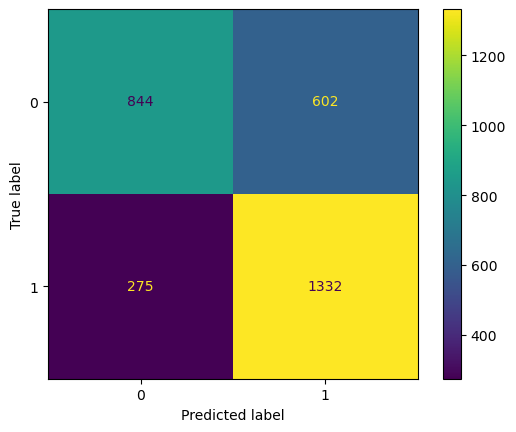

In [44]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,xgb_preds)
# Plot confusion matrix
ConfusionMatrixDisplay(cm).plot()

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

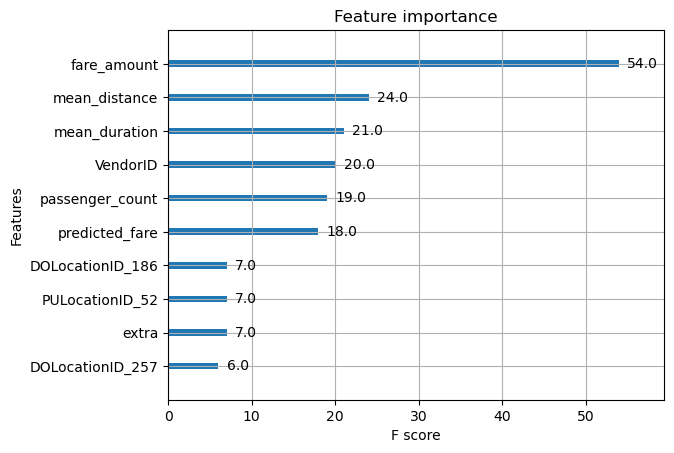

In [45]:
plot_importance(xgb_cv.best_estimator_,max_num_features=10)

### Random Forest vs XGBoost model's Rsult

In [46]:
pd.concat([rf_train_scores, rf_test_scores, xgb_train_scores,xgb_test_scores],axis=0)

,model,precision,recall,F1,accuracy
0,RF cv,0.693931,0.818040,0.750892,0.714286
0,RF test,0.684129,0.820784,0.746252,0.706191
0,XGB cv,0.696770,0.821928,0.754192,0.717970
0,XGB Test,0.688728,0.828874,0.752330,0.712742


### **Task 4. Conclusion**


The model performs acceptably. Its F<sub>1</sub> score was 0.7535 and it had an overall accuracy of 0.7127. It may be worthwhile to test the model with a select group of taxi drivers to get feedback.  


Unfortunately, random forest is not the most transparent machine learning algorithm. We know that `fare_amount`, `mean_duration`, `mean_distance`, and `VendorID` are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that `VendorID` is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.  

It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash. It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.


Remember, sometimes data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions.